In [1]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
from graphviz import Digraph


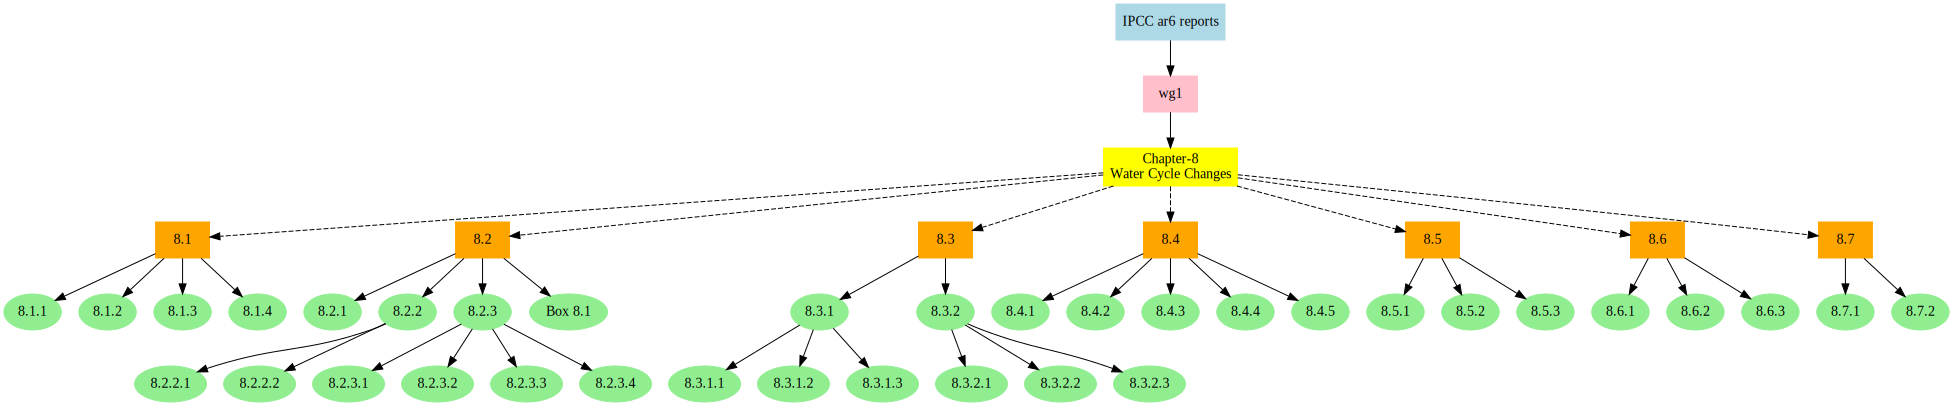

In [5]:
from graphviz import Digraph

dot = Digraph()

# Top-level IPCC structure
dot.node('ipcc', 'IPCC ar6 reports', shape='box', style='filled', color='lightblue')
dot.node('wg1', 'wg1', shape='box', style='filled', color='pink')
dot.edge('ipcc', 'wg1')

# Chapter 8
dot.node('ch8', 'Chapter-8\nWater Cycle Changes', shape='box', style='filled', color='yellow')
dot.edge('wg1', 'ch8')

# Main Sections 8.1 to 8.7
sections = ['8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7']
for sec in sections:
    dot.node(sec, sec, shape='box', style='filled', color='orange')
    dot.edge('ch8', sec, style='dashed')

# Subsections for each section (use ellipses)
subsections = {
    '8.1': ['8.1.1', '8.1.2', '8.1.3', '8.1.4'],
    '8.2': ['8.2.1', '8.2.2', '8.2.3', 'Box 8.1'],
    '8.2.2': ['8.2.2.1', '8.2.2.2'],
    '8.2.3': ['8.2.3.1', '8.2.3.2', '8.2.3.3', '8.2.3.4'],
    '8.3': ['8.3.1', '8.3.2'],
    '8.3.1': ['8.3.1.1', '8.3.1.2', '8.3.1.3'],
    '8.3.2': ['8.3.2.1', '8.3.2.2', '8.3.2.3'],
    '8.4': ['8.4.1', '8.4.2', '8.4.3', '8.4.4', '8.4.5'],
    '8.5': ['8.5.1', '8.5.2', '8.5.3'],
    '8.6': ['8.6.1', '8.6.2', '8.6.3'],
    '8.7': ['8.7.1', '8.7.2'],
}

# Draw sub-nodes and connections
for parent, children in subsections.items():
    for child in children:
        dot.node(child, child, shape='ellipse', style='filled', color='lightgreen')
        dot.edge(parent, child)

# Render the graph
dot.render('/mnt/data/ch8_water_cycle_graph_cleaned', format='png', cleanup=False)
dot
